In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


csv = 'afpm-gen_Bxyz_dataframe.csv'
Bxyz_df = pd.read_csv(csv)

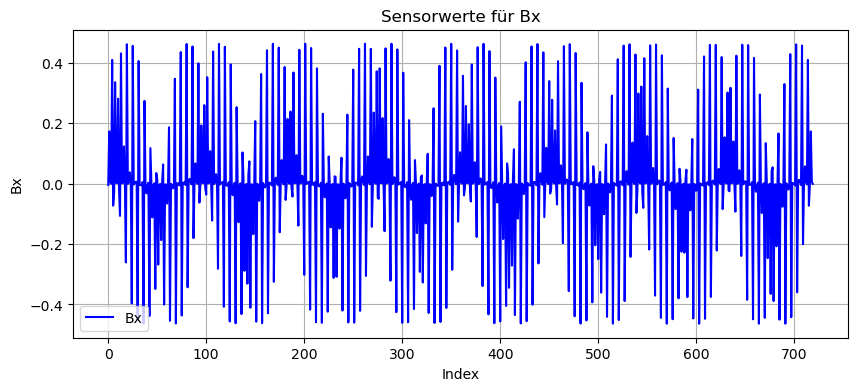

In [18]:
# Alle Werte für Bx extrahieren
Bx_werte = Bxyz_df['Bx']

# Grafik erstellen
plt.figure(figsize=(10, 4))
plt.plot(Bx_werte, label='Bx', color='blue')
plt.xlabel('Index')
plt.ylabel('Bx')
plt.title('Sensorwerte für Bx')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Reload the DataFrame and create a new DataFrame Bx_df
# Limiting to paths from 0 to 40 and adding path value 41 with Bx = 0

# Reload the DataFrame
df = pd.read_csv('afpm-gen_Bxyz_dataframe.csv')

# Limit the DataFrame to paths from 0 to 40
df_pathstep = df[df['path'] <= 45]

# Add an additional point for path 41, where Bx = 0
additional_point = pd.DataFrame({'path': [41], 'Bx': [0]})
Bx_df = pd.concat([df_pathstep, additional_point], ignore_index=True)

Bx_df.tail()  # Display the last entries of the DataFrame to check correctness


source  path                    sensor  pixel        Bx        By  \
272  sumup (32)    45  Sensor(id=2687821113200)    0.0  0.004682 -0.015429   
273  sumup (32)    45  Sensor(id=2687821114256)    0.0  0.000244  0.016107   
274  sumup (32)    45  Sensor(id=2687788444416)    0.0  0.372639 -0.122870   
275  sumup (32)    45  Sensor(id=2687818885168)    0.0 -0.045655  0.066665   
276         NaN    41                       NaN    NaN  0.000000       NaN   

             Bz  
272   -8.880752  
273   -5.165821  
274 -133.382096  
275   -4.750053  
276         NaN

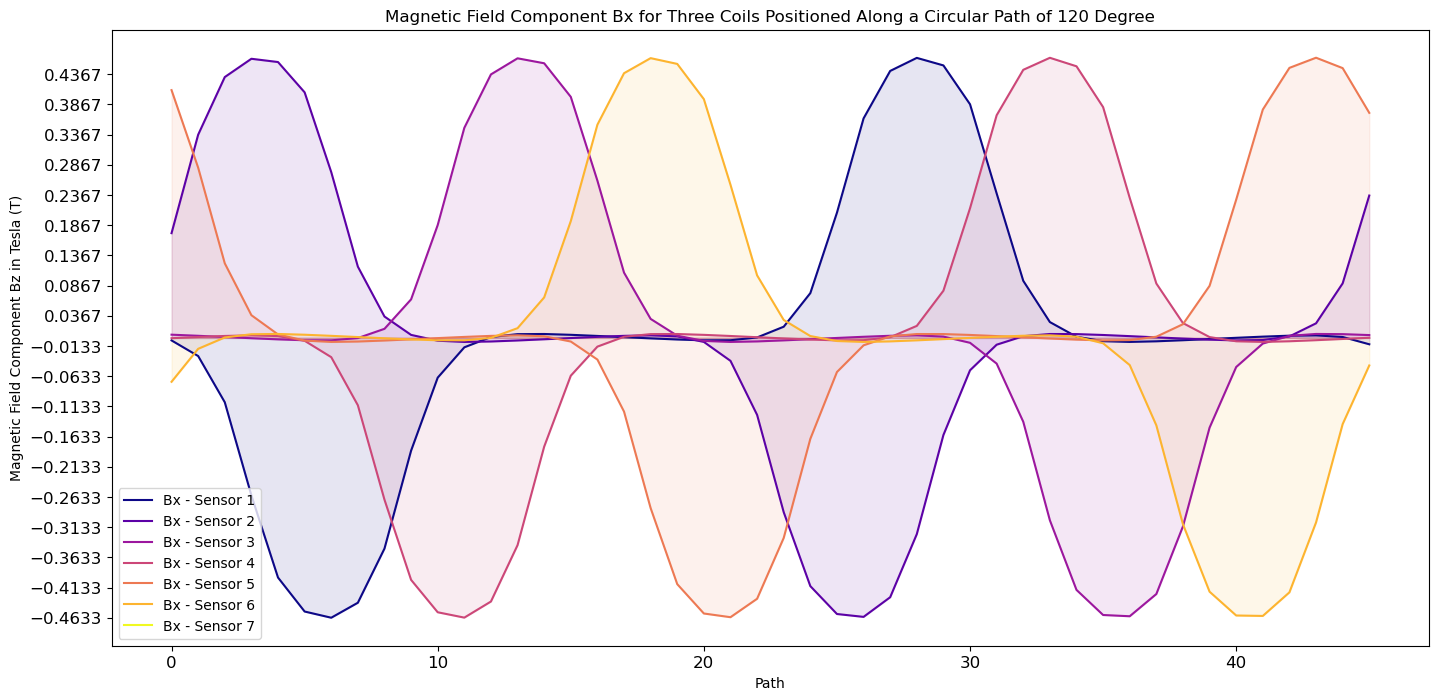

In [24]:
# Visualization of magnetic field component Bx around a circular path using Bx_df DataFrame

Bx_df = Bx_df.sort_values('path')

plt.figure(figsize=(17, 8))

# Identifying unique sensors in Bx_df
unique_sensors = Bx_df['sensor'].unique()

# Colormap for plot
colormap = cm.plasma(np.linspace(0, 1, len(unique_sensors)))  # 'plasma' colormap

# Plotting data for each sensor
for i, sensor in enumerate(unique_sensors):
    sensor_data = Bx_df[Bx_df['sensor'] == sensor]
    plt.plot(sensor_data['path'], sensor_data['Bx'], label=f'Bx - Sensor {i+1}', color=colormap[i])
    # Filled area under the curve
    plt.fill_between(sensor_data['path'], sensor_data['Bx'], color=colormap[i], alpha=0.1)  

# Adding title, axis labels, and legend
plt.title('Magnetic Field Component Bx for Three Coils Positioned Along a Circular Path of 120 Degree')
plt.xlabel('Path')
plt.ylabel('Magnetic Field Component Bz in Tesla (T)')
plt.legend()

plt.yticks(np.arange(min(Bx_df['Bx']), max(Bx_df['Bx']), step=0.05))  
plt.tick_params(axis='both', which='major', labelsize=12)  

# Displaying the plot
plt.show()


In [22]:
import pandas as pd


df = pd.read_csv('duo_sensor_dataframe.csv')



In [23]:

bx_sensor_df = df[['path', 'sensor', 'Bx']].copy()

bx_sensor_df.head()



path                    sensor        Bx
0     0  Sensor(id=2687822016384) -0.004186
1     0  Sensor(id=2687821111616)  0.173416
2     1  Sensor(id=2687821111616)  0.336440
3     1  Sensor(id=2687822016384) -0.030024
4     2  Sensor(id=2687822016384) -0.106552

In [24]:
bx_sensor_df

path                    sensor        Bx
0       0  Sensor(id=2687822016384) -0.004186
1       0  Sensor(id=2687821111616)  0.173416
2       1  Sensor(id=2687821111616)  0.336440
3       1  Sensor(id=2687822016384) -0.030024
4       2  Sensor(id=2687822016384) -0.106552
..    ...                       ...       ...
235   117  Sensor(id=2687821111616) -0.359879
236   118  Sensor(id=2687821111616) -0.200289
237   118  Sensor(id=2687822016384)  0.457726
238   119  Sensor(id=2687822016384)  0.410276
239   119  Sensor(id=2687821111616) -0.072681

[240 rows x 3 columns]

In [26]:
# Gruppiere die Daten nach 'path' und summiere die Beträge der Bx-Werte der Sensoren
df_combined = df.groupby('path')['Bx'].apply(lambda x: x.abs().sum()).reset_index(name='Bx_combined')

df_combined.head()


path  Bx_combined
0     0     0.177602
1     1     0.366463
2     2     0.538447
3     3     0.722994
4     4     0.853582

In [ ]:
### !!!!! highly experimental !!!!! ###

In [ ]:
#
#
#
#
# Assume that the magnetic induction in each coil is identical and that there are no internal losses
# This is a simplifying assumption that may not hold true in a real-world scenario due to factors like
# eddy currents and air gap variations that can affect the magnetic field and thus the induced voltage
#
#

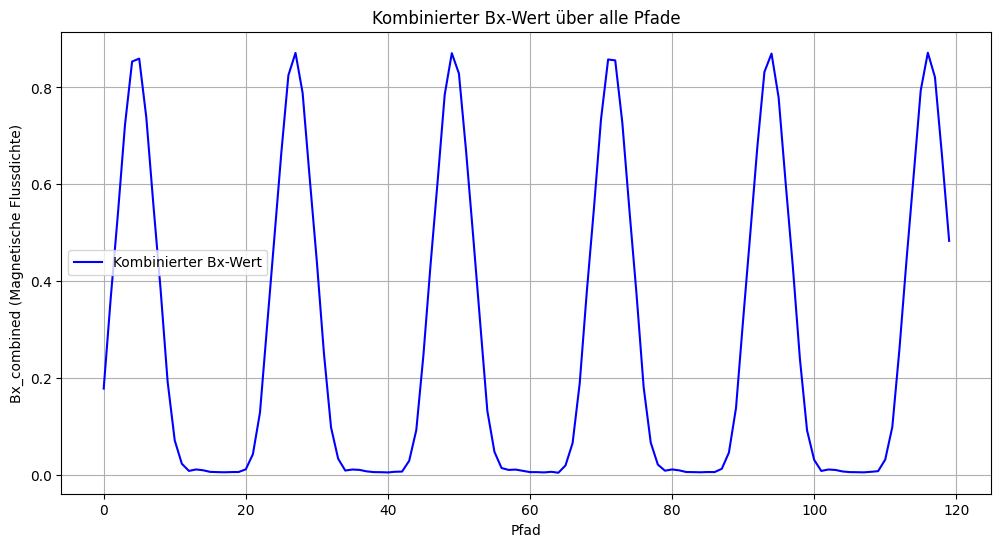

In [27]:
import matplotlib.pyplot as plt

# Plotte den kombinierten Bx-Wert für jeden Pfad
plt.figure(figsize=(12, 6))
plt.plot(df_combined['path'], df_combined['Bx_combined'], label='Kombinierter Bx-Wert', color='blue')
plt.title('Kombinierter Bx-Wert über alle Pfade')
plt.xlabel('Pfad')
plt.ylabel('Bx_combined (Magnetische Flussdichte)')
plt.legend()
plt.grid(True)
plt.show()


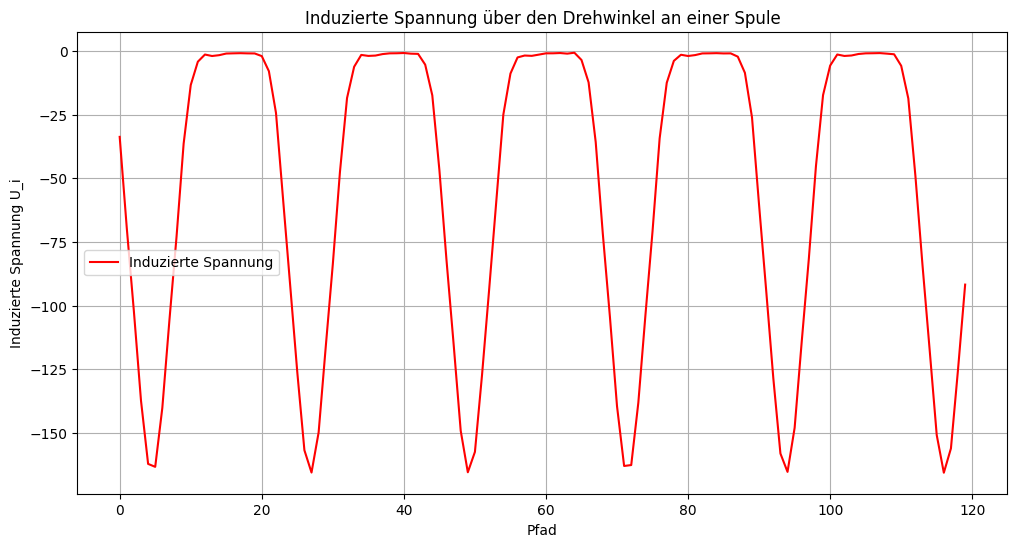

In [21]:
.
# Die induzierte Spannung Ui ist -N * ΔBx / Δt, wobei N die Anzahl der Wicklungen ist und Δt die Zeitänderung.

N = 190  # Anzahl der Wicklungen

# Da keine Zeitangaben vorliegen, gehen wir von Δt = 1 zwischen den Messungen aus
df_combined['Ui'] = -N * df_combined['Bx_combined']

# Plotte die induzierte Spannung Ui über die Pfade
plt.figure(figsize=(12, 6))
plt.plot(df_combined['path'], df_combined['Ui'], label='Induzierte Spannung', color='red')
plt.title('Induzierte Spannung über den Drehwinkel an einer Spule')
plt.xlabel('Pfad')
plt.ylabel('Induzierte Spannung U_i')
plt.legend()
plt.grid(True)
plt.show()
